In [1]:
from matplotlib import pyplot as plt
import pandas as pd

In [6]:
# Create restaurants dataframe
restaurants = pd.read_csv('restaurants.csv')

In [7]:
# Inspect restaurant dataframe
restaurants.head()

,id,name,neighborhood,cuisine
0,1,Jongro BBQ,Midtown,Korean
1,2,Pocha 32,Midtown,Korean
2,3,Nom Wah Tea Parlor,Chinatown,Chinese
3,4,Roberta’s,Brooklyn,Pizza
4,5,Speedy Romeo,Brooklyn,Pizza


In [8]:
# Check number of unique cuisines
restaurants.cuisine.nunique()

7

In [9]:
# Group count by cuisine
cuisine_counts = restaurants.groupby('cuisine').name.count().reset_index()
# Inspect cuisine_counts dataframe
cuisine_counts

,cuisine,name
0,American,10
1,Chinese,11
2,Italian,8
3,Japanese,4
4,Korean,3
5,Pizza,4
6,Vegetarian,4


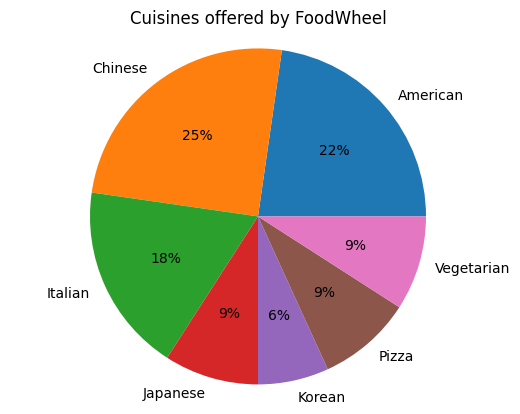

In [10]:
# Create a pie chart
plt.pie(cuisine_counts.name.values,
       labels=cuisine_counts.cuisine.values,
       autopct='%d%%')
plt.axis('equal')
plt.title('Cuisines offered by FoodWheel')
plt.show()

In [11]:
# Create orders dataframe
orders = pd.read_csv('orders.csv')

In [12]:
# Inspect the orders dataframe
orders.head()

,id,customer_id,date,price
0,1,61,6-18-2017,13.0
1,2,210,5-8-2017,21.0
2,3,0,9-7-2017,33.0
3,4,66,7-7-2017,19.0
4,5,65,4-26-2017,13.0


In [13]:
# Create new month column
orders['month'] = orders.date.apply(lambda x: x.split('-')[0])
# Inspect new orders dataframe
orders.head()

,id,customer_id,date,price,month
0,1,61,6-18-2017,13.0,6
1,2,210,5-8-2017,21.0,5
2,3,0,9-7-2017,33.0,9
3,4,66,7-7-2017,19.0,7
4,5,65,4-26-2017,13.0,4


In [14]:
# Create average order by month dataframe
avg_order = orders.groupby('month').price.mean().reset_index()
# Inspect avg_order dataframe
avg_order

,month,price
0,4,9.609195
1,5,14.858824
2,6,15.152174
3,7,18.012821
4,8,21.150685
5,9,29.505882


In [15]:
# Create standard deviation dataframe
std_order = orders.groupby('month').price.std().reset_index()
# Inspect std_order
std_order

,month,price
0,4,2.562504
1,5,3.395210
2,6,2.835934
3,7,2.848985
4,8,4.455556
5,9,4.518806


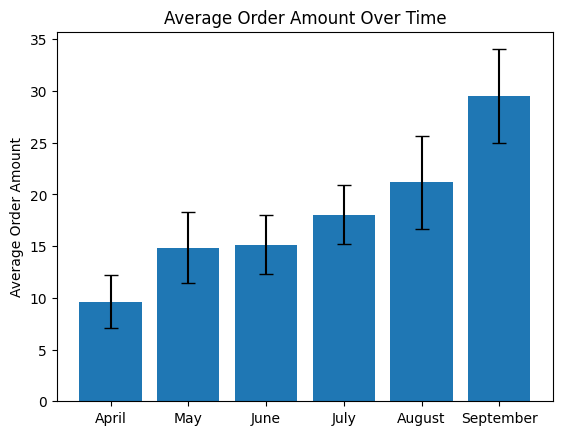

In [16]:
# Create barplot
ax = plt.subplot()
plt.bar(range(len(avg_order)),
       avg_order.price,
       yerr=std_order.price,
       capsize=5)
ax.set_xticks(range(len(avg_order)))
ax.set_xticklabels(['April', 'May', 'June', 'July', 'August', 'September'])
plt.ylabel('Average Order Amount')
plt.title('Average Order Amount Over Time')
plt.show()

In [17]:
# Create customer amount dataframe
customer_amount = orders.groupby('customer_id').price.sum().reset_index()
# Inspect customer amount
customer_amount.head()


,customer_id,price
0,0,83.0
1,2,11.0
2,3,65.0
3,4,32.0
4,5,119.0


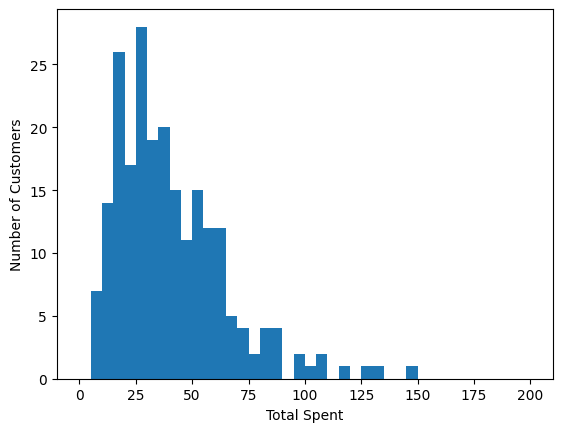

In [18]:
# Create histogram
plt.hist(customer_amount.price.values,
        range=(0, 200), bins=40)
plt.xlabel('Total Spent')
plt.ylabel("Number of Customers")
plt.show()